## 3.3　前処理とスケール変換

In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

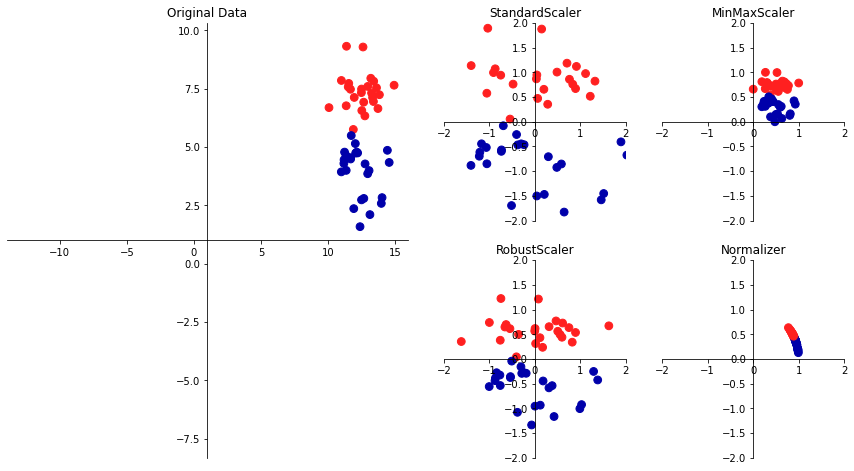

In [2]:
mglearn.plots.plot_scaling()

### 3.3.2　データ変換の適用

In [3]:
cancer = load_breast_cancer()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
np.set_printoptions(precision=2, suppress=True)

In [6]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
print('transformed shape: {}'.format(X_train_scaled.shape))
print('per-feature minimum before scalling:\n {}'.format(X_train.min(axis=0)))
print('per-feature maximum before scalling:\n {}'.format(X_train.max(axis=0)))
print('per-feature minimum after scalling:\n {}'.format(X_train_scaled.min(axis=0)))
print('per-feature maximum after scalling:\n {}'.format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scalling:
 [  6.98   9.71  43.79 143.5    0.05   0.02   0.     0.     0.11   0.05
   0.12   0.36   0.76   6.8    0.     0.     0.     0.     0.01   0.
   7.93  12.02  50.41 185.2    0.07   0.03   0.     0.     0.16   0.06]
per-feature maximum before scalling:
 [  28.11   39.28  188.5  2501.      0.16    0.29    0.43    0.2     0.3
    0.1     2.87    4.88   21.98  542.2     0.03    0.14    0.4     0.05
    0.06    0.03   36.04   49.54  251.2  4254.      0.22    0.94    1.17
    0.29    0.58    0.15]
per-feature minimum after scalling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scalling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
np.set_printoptions(precision=3, suppress=True)

In [8]:
X_test_scaled = scaler.transform(X_test)
print('per-feature minimum after scaling:\n{}'.format(X_test_scaled.min(axis=0)))
print('per-feature minimum after scaling:\n{}'.format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
per-feature minimum after scaling:
[0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


### 3.3.3　訓練データとテストデータを同じように変換する

In [9]:
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

In [10]:
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)
print(X_train.shape)
print(X_test.shape)

(45, 2)
(5, 2)


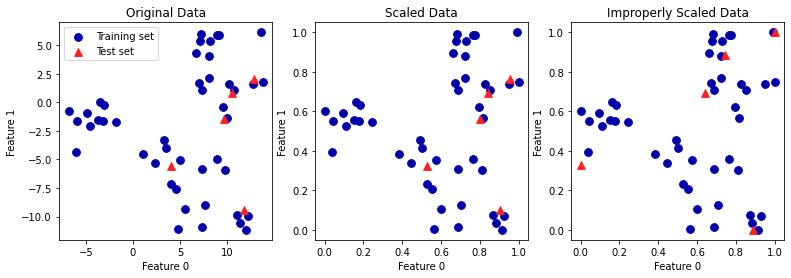

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=[mglearn.cm2(0)], label='Training set', s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=[mglearn.cm2(1)], label='Test set', s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('Original Data')

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=[mglearn.cm2(0)], label='Training set', s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=[mglearn.cm2(1)], label='Test set', s=60)
axes[1].set_title('Scaled Data')

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=[mglearn.cm2(0)], label='Training set', s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c=[mglearn.cm2(1)], label='Test set', s=60)
axes[2].set_title('Improperly Scaled Data')

for ax in axes:
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)
X_scaled_d = scaler.fit_transform(X)

### 3.3.4　教師あり学習における前処理の結果

In [13]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print('Test set accuracy: {:.2f}'.format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


In [14]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
print('Scaled test set accuracy: {:.2f}'.format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
print('SVM test accuracy: {:.2f}'.format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96
